**ВАРІАНТ 1**

**ЗАВДАННЯ 1**

Створити нейронну мережу (модель) з використанням згорткових шарів для датасета
cifar 10 (mnist, fasion mnist).

1. для цього завантажити датасет, вивести перші 10 зображень.

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


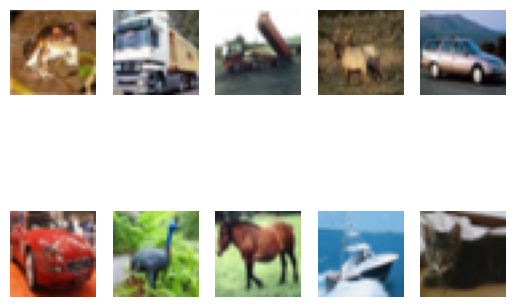

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

2. Підготувати дані.

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

3. Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість
епох).

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості
навчання).

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2881 - loss: 1.8896 - val_accuracy: 0.5321 - val_loss: 1.2938 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.5275 - loss: 1.3154 - val_accuracy: 0.6042 - val_loss: 1.1087 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 87ms/step - accuracy: 0.5999 - loss: 1.1329 - val_accuracy: 0.6367 - val_loss: 1.0189 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6493 - loss: 1.0035 - val_accuracy: 0.6620 - val_loss: 0.9535 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.6762 - loss: 0.9317 - val_accuracy: 0.6800 - val_loss: 0.9121 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6994 - loss: 0.8525 - val_accuracy: 0.6876 - val_loss: 0.9069 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.7203 - l

5. вивести summary.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 681,440 (2.60 MB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454,294 (1.73 MB)

6. побудувати графіки функції втрат і точності.

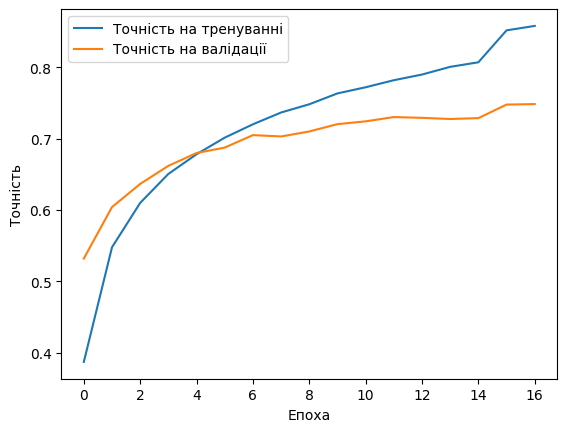

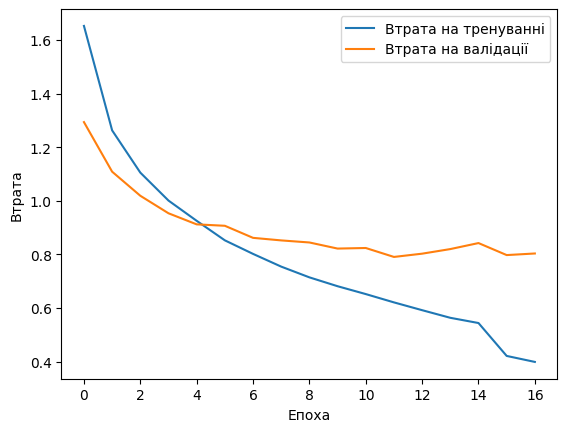

In [7]:
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

7. класифікаційний звіт.

In [8]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1000
           1       0.86      0.85      0.86      1000
           2       0.64      0.63      0.63      1000
           3       0.50      0.61      0.55      1000
           4       0.68      0.70      0.69      1000
           5       0.69      0.56      0.62      1000
           6       0.78      0.80      0.79      1000
           7       0.77      0.76      0.76      1000
           8       0.81      0.86      0.84      1000
           9       0.80      0.81      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



8. візуалізацію розпізнавання.

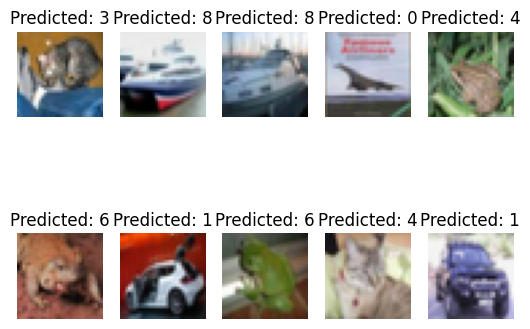

In [9]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

**ЗАВДАННЯ 2**

1. Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).

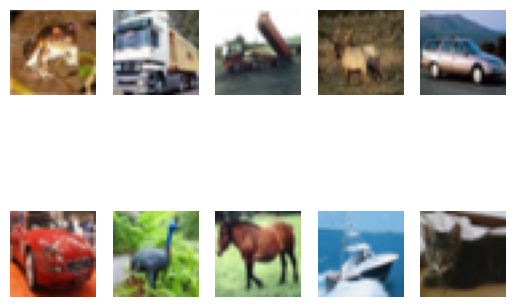

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [12]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential([
    resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари)

In [13]:
for layer in resnet.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])



3. Повторити всі кроки як і для попереднього завдання

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 255s 312ms/step - accuracy: 0.1555 - loss: 4.9451 - val_accuracy: 0.3888 - val_loss: 1.8841 - learning_rate: 1.0000e-05
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 244s 312ms/step - accuracy: 0.3006 - loss: 2.5478 - val_accuracy: 0.4471 - val_loss: 1.6194 - learning_rate: 1.0000e-05
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 310ms/step - accuracy: 0.3594 - loss: 1.9979 - val_accuracy: 0.4737 - val_loss: 1.5221 - learning_rate: 1.0000e-05
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 311ms/step - accuracy: 0.4001 - loss: 1.7865 - val_accuracy: 0.4956 - val_loss: 1.4614 - learning_rate: 1.0000e-05
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 306ms/step - accuracy: 0.4306 - loss: 1.6630 - val_accuracy: 0.5114 - val_loss: 1.4138 - learning_rate: 1.0000e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 305ms/step - accuracy: 0.4598 - loss: 1.5784 - val_accuracy: 0.5289 - val_loss: 1.3742 - learning_rate: 1.0000e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 

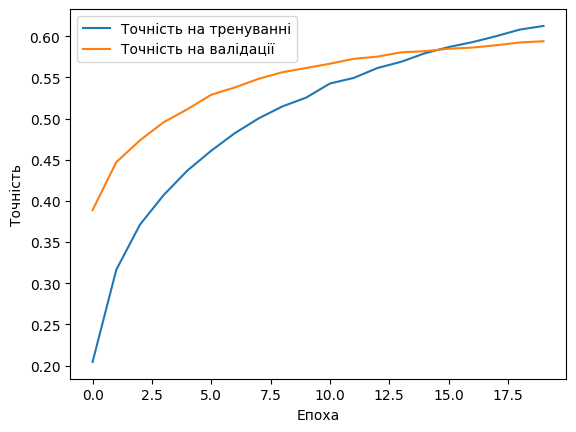

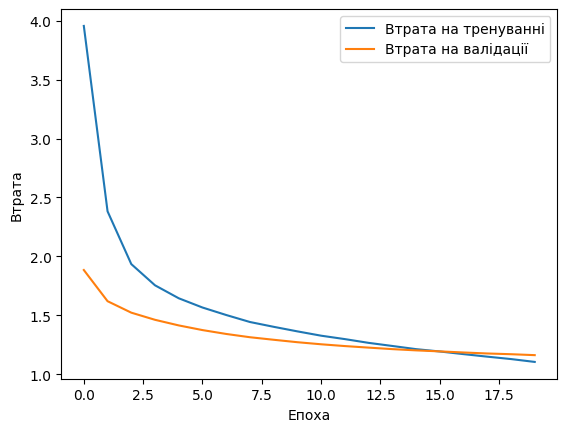

In [15]:
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1000
           1       0.63      0.63      0.63      1000
           2       0.53      0.46      0.49      1000
           3       0.45      0.47      0.46      1000
           4       0.57      0.55      0.56      1000
           5       0.53      0.52      0.53      1000
           6       0.64      0.70      0.67      1000
           7       0.64      0.62      0.63      1000
           8       0.67      0.68      0.68      1000
           9       0.62      0.68      0.64      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



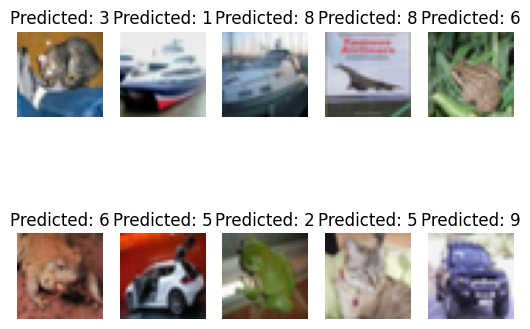

In [17]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()